In [1]:
require(ISLR2)

Loading required package: ISLR2



In [2]:
Hitters = na.omit(Hitters)

In [3]:
library(leaps)

Warning message:
"package 'leaps' was built under R version 4.3.3"


In [4]:
regfit_fwd = regsubsets(Salary ~., data = Hitters, nvmax = 19, method = 'forward')

In [5]:
summary(regfit_fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

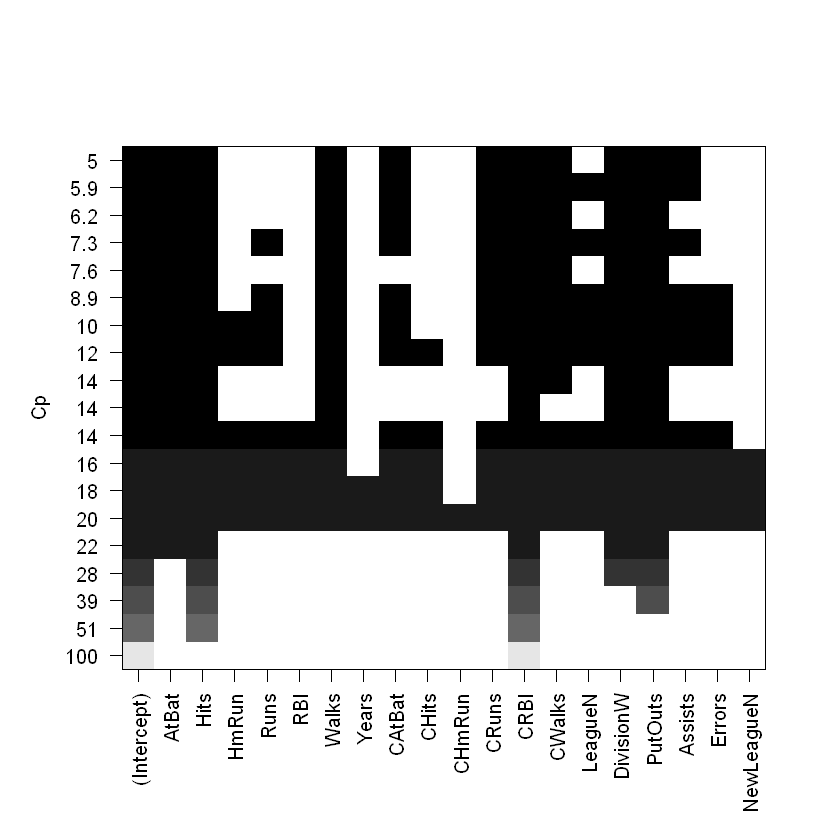

In [6]:
plot(regfit_fwd, scale = 'Cp')

In [7]:
dim(Hitters)

[1] 263  20

In [8]:
set.seed(1)

In [9]:
train = sample(263, 180, replace = FALSE)

In [10]:
train

[1] 167 129 187  85  79 213  37 105 217 110 229 165  34 106 126  89 172 207
 [19]  33  84 163  70  74  42 166 111 148 156  20  44 121  87 242 233  40 247
 [37]  25 119 198 122  39 179 240 134  24 160  14 130  45 146  22 206 193 115
 [55] 104 231 208 209 103  75  13 253 176 248  23 254 244 205  29 141 150 236
 [73] 108  48 245 215 149  31 102 145  73 232  83 118  90 190 107  64 196  60
 [91]  51 251 138 262  43  26 143 195 152 178 223 219 202 181 222 169   1 239
[109]  78 211 246  28 116 257  61 113  86  71 225  99 173 234  49 256 174 194
[127]  50 135 238 235 230 263  53 100 164  65 142 175 140 124 224  77 159  98
[145]  66  19  17 228 204 186  35 144  46 180 109 210  16 161   9 137  92 162
[163]  10 259  32 243  95 154  93  12 255 177  15   2 128  67 183 117 197   5

In [11]:
regfit_fwd_CV = regsubsets(Salary ~., data = Hitters[train,], nvmax = 19, method = 'forward')

In [12]:
val_errors = rep(NA, 19)

In [13]:
dim(val_errors)

NULL

In [14]:
x_test = model.matrix(Salary ~ ., data = Hitters[-train, ])

In [15]:
x_test

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Andre Dawson,1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Andres Galarraga,1,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
-Al Newman,1,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,0
-Argenis Salazar,1,298,73,0,24,24,7,3,509,108,0,41,37,12,0,1,121,283,9,0
-Andres Thomas,1,323,81,6,26,32,8,2,341,86,6,32,34,8,1,1,143,290,19,1
-Alex Trevino,1,202,53,4,31,26,27,9,1876,467,15,192,186,161,1,1,304,45,11,1
-Barry Bonds,1,413,92,16,72,48,65,1,413,92,16,72,48,65,1,0,280,9,5,1
-Bill Buckner,1,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,0,0,1067,157,14,0
-Billy Hatcher,1,419,108,6,55,36,22,3,591,149,8,80,46,31,1,1,226,7,4,1
-Bill Madlock,1,379,106,10,38,60,30,14,6207,1906,146,859,803,571,1,1,72,170,24,1


In [16]:
for(i in 1:19){
    coefi = coef(regfit_fwd_CV, id = i)
    pred = x_test[, names(coefi)] %*% coefi
    val_errors[i] = mean((Hitters$Salary[-train] - pred)^2)
}

In [17]:
length(val_errors)

[1] 19

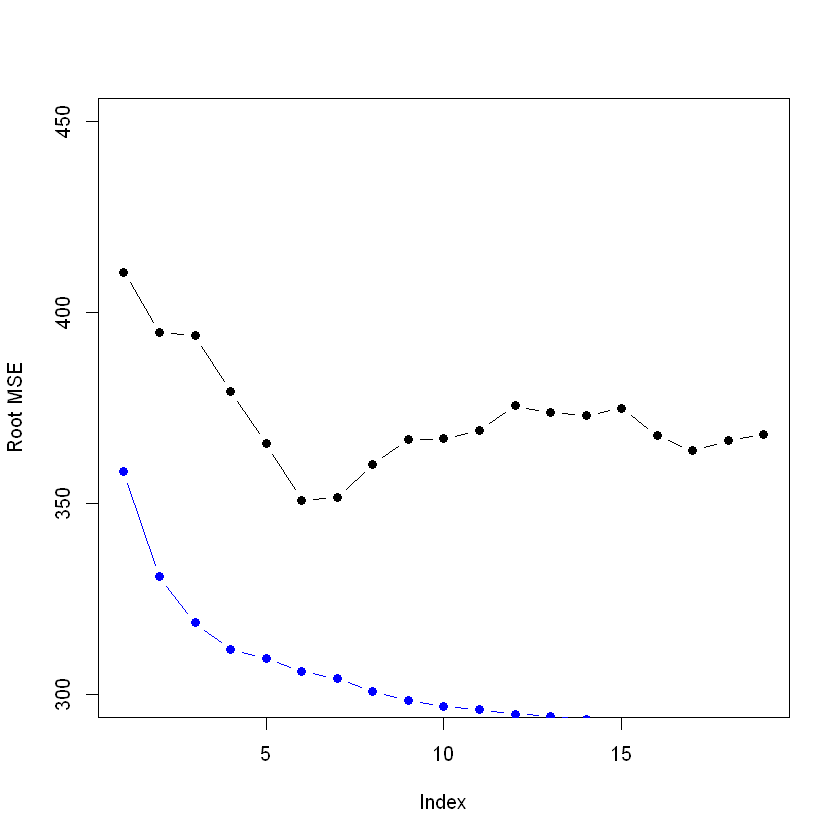

In [18]:
plot(sqrt(val_errors), ylab = "Root MSE", ylim = c(300,450), pch = 19, type= 'b')
points(sqrt(regfit_fwd_CV$rss[-1]/180), col='blue', pch=19,type='b')

In [19]:
predict_regsubsets = function(object, newdata, id, ...){
    form = as.formula(object$call[[2]])
    mat = model.matrix(form, newdata)
    coefi = coef(object, id =id)
    mat[, names(coefi)] %*% coefi
}

In [20]:
set.seed(11)

In [21]:
folds = sample(rep(1:10, length = nrow(Hitters)))

In [22]:
folds

[1] 10  4  4  4  3  7 10  8 10  3  4  2  2  1  1  5  3  3  5  9  5  2  7  3  8
 [26]  7  4  6  7  7  7 10  2  6  6  1  8  8 10  1  8  3  7 10  1  6 10  3  8  7
 [51]  9  3  6  2  5  6  5  5  2  6  4  7 10  7  1  8  1  2  8  2  1  8  2  6  4
 [76]  3  1  1  5  1  2 10  5  8  8  3  9  8  3  6  1  9  5  9  9  8  8  6  8 10
[101]  9  8  7  8 10  1  3  1 10  5  2  5  2  4  4 10  3  6  9  7  4  3  9  8 10
[126]  7  5  9 10  4  7  4  1  9  4  5  6  8 10  6  7  1 10  6  4  6  7  1  9  4
[151]  2  1  7  2  5  7 10  7  9  6  9  5  5  4 10  4  2 10  9  3  3  2  9  2  6
[176]  9  4  3  9  9  9  4  6  1  7  8  5  8 10  6  9  8  9  1  5  3  3  1  7  1
[201]  2  9  1  9 10  3 10  3  4  6  8  2  9  5  7  2 10  4  1  6 10  3  5  5  3
[226]  5  7  3  6  5  4  1  3  7  1  5  2  9  4  6  8  3  2  4  5 10  8  5  2  2
[251]  2  6  3  4  7  2  6  4  8  7  1  2  6

In [23]:
table(folds)

folds
 1  2  3  4  5  6  7  8  9 10 
27 27 27 26 26 26 26 26 26 26 

In [24]:
cv_errors = matrix(NA, 10, 19)

In [31]:
cv_errors

218240.04,163639.42,169825.36,151105.23,141610.90,130252.84,131149.23,128175.25,135362.39,126755.86,124870.76,125604.91,128050.98,128149.23,127349.64,127307.91,127341.31,126708.57,126702.14
196188.92,139208.46,126130.59,119425.48,111741.12,96786.61,107795.02,104119.52,100669.14,108334.94,113965.80,118144.73,117781.00,121088.28,123481.95,122472.09,121915.50,121798.22,121760.24
58252.35,43570.79,59423.87,61042.34,72104.99,67263.69,69384.20,76621.14,76142.37,81593.36,84386.26,87096.30,86574.94,84151.26,85366.46,84143.22,85336.19,85243.37,85181.28
77712.42,71237.57,75603.07,88259.72,94107.51,101104.41,112724.54,111539.83,108306.47,114309.33,114851.08,108497.30,108144.06,110346.36,110213.07,110315.39,111800.83,111606.51,111205.98
139696.14,144517.49,151962.45,149953.23,154398.46,144223.20,138758.12,118590.43,121111.10,113732.32,113184.12,115749.87,118236.30,118638.25,120101.84,120345.37,120570.79,120311.27,120583.58
169103.23,131768.06,140812.39,138657.33,125993.00,112207.54,120483.55,116012.22,112891.01,120488.05,116341.80,115781.80,120347.83,122889.20,132011.28,134475.50,133008.77,132893.96,132026.71
129523.88,84254.96,86090.44,62625.86,51835.19,46811.99,48759.19,49155.36,47565.24,48421.01,49869.12,50012.08,49875.00,48983.88,49110.18,48825.46,48918.59,48761.59,48769.52
141356.10,139240.23,125253.25,113573.48,108451.55,105884.88,107457.64,101092.55,96353.10,94015.67,96788.43,95492.23,96146.08,96766.25,102242.18,108895.78,109434.73,110157.49,110231.96
203701.76,239272.83,236891.59,223529.09,226688.66,212668.31,213815.03,201023.06,196577.13,196864.92,192446.42,191117.67,191943.64,192752.27,192024.24,191418.22,191059.93,191254.89,191328.28
148031.33,152739.33,108755.50,112454.94,117476.94,142187.46,127227.67,124752.77,98380.49,97892.28,107449.65,115263.43,106569.71,129929.21,131706.92,129660.47,130004.37,130542.71,131606.89


In [27]:
for(k in 1:10){
    best_fit = regsubsets(Salary ~ ., Hitters[folds != k,], nvmax = 19, method = "forward")
    for(i in 1:19){
        pred = predict_regsubsets(best_fit, Hitters[folds == k,], id = i)
        cv_errors[k,i] = mean((Hitters$Salary[folds == k] - pred)^2)
    }
}

In [29]:
rmse_cv = sqrt(apply(cv_errors,2 ,mean))

In [32]:
rmse_cv

[1] 384.9424 361.8631 357.8755 349.3747 347.0459 340.4983 343.1551 336.3156
 [9] 330.6597 332.0253 333.7894 335.0762 335.2118 339.6607 342.5796 343.1996
[17] 343.4226 343.4063 343.4234

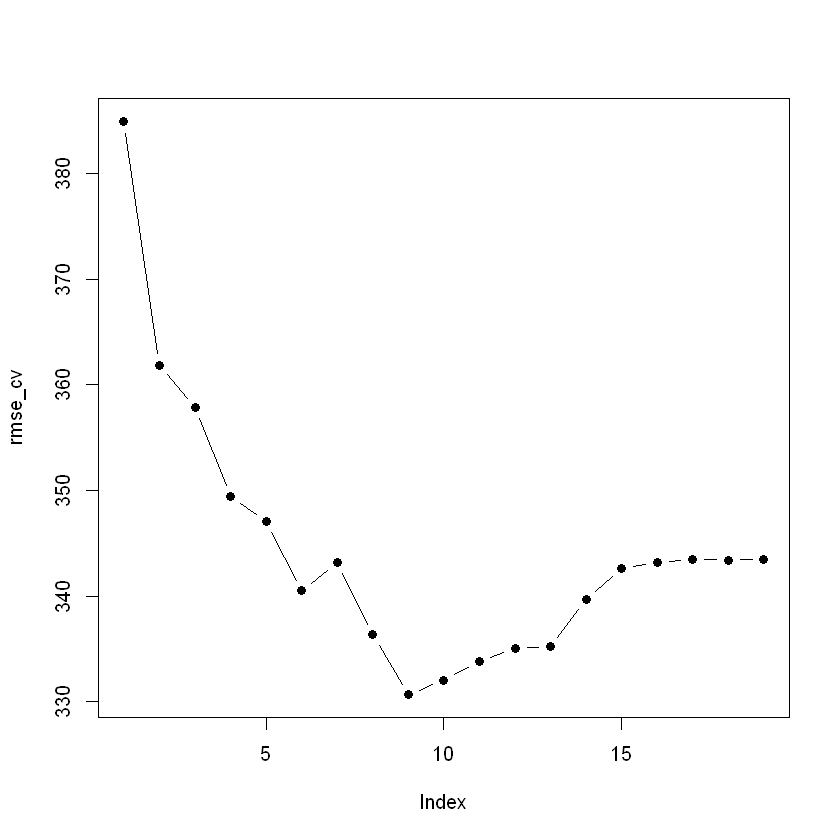

In [30]:
plot(rmse_cv, pch = 19, type = "b")